In [1]:
# Libraries
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import pandas as pd
import numpy as np
import mitosheet
import dtale
import time
import re
from ydata_profiling import ProfileReport

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error as mae
from tabulate import tabulate

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Import Dataset
df = pd.read_csv('../Data/airline_passenger_satisfaction.csv')

Género: Género de los pasajeros (Mujer, Hombre)

Tipo de cliente: el tipo de cliente (cliente leal, cliente desleal)

Edad: La edad real de los pasajeros.

Tipo de Viaje: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Clase: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

Distancia de vuelo: la distancia de vuelo de este viaje.

Servicio wifi a bordo: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)

Hora de salida/llegada conveniente: Nivel de satisfacción de la hora de salida/llegada conveniente

Facilidad de reserva en línea: nivel de satisfacción de la reserva en línea

Ubicación de la puerta: Nivel de satisfacción de la ubicación de la puerta

Comida y bebida: Nivel de satisfacción de Comida y bebida

Embarque online: Nivel de satisfacción del embarque online

Confort del asiento: Nivel de satisfacción del confort del asiento

Entretenimiento a bordo: Nivel de satisfacción del entretenimiento a bordo

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Servicio de habitaciones para piernas: Nivel de satisfacción del servicio de habitaciones para piernas

Manejo de equipaje: Nivel de satisfacción en el manejo de equipaje

Servicio de Check-in: Nivel de satisfacción del servicio de Check-in

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Limpieza: Nivel de satisfacción de la Limpieza

Retraso de salida en minutos: Minutos de retraso a la salida

Retraso de llegada en minutos: Minutos de retraso cuando llega

Satisfacción: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)

In [3]:
# VEMOS LA INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
# VEMOS EL TAMAÑO DEL DATASET
df.shape

(103904, 25)

In [5]:
# LA CANTIDAD DE NULOS POR COLUMNA
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## PODEMOS VER QUE LA UNICA COL QUE TIENE NULOS ES LA COLUMNA DE Arrival Delay in Minutes 

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

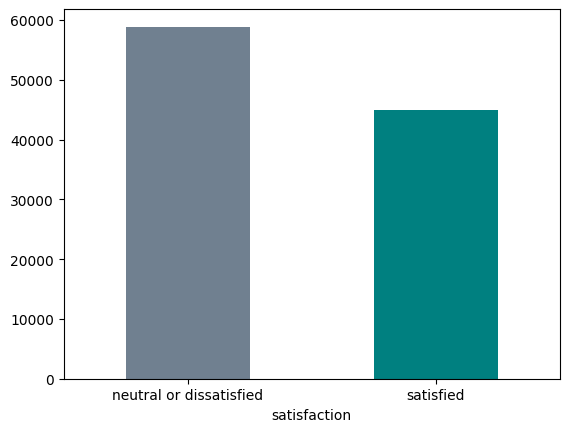

In [6]:
# GRAFICAMOS LA COL SATISFACTION
df['satisfaction'].value_counts(normalize = True)*100
df['satisfaction'].value_counts().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)

PODEMOS CONCLUIR CON LO SIGUIENTE :    
El 43,33% de los pasajeros están satisfechos con los servicios de la aerolínea.   
El 56,67% de los pasajeros se muestran neutrales o insatisfechos con los servicios de las aerolíneas

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



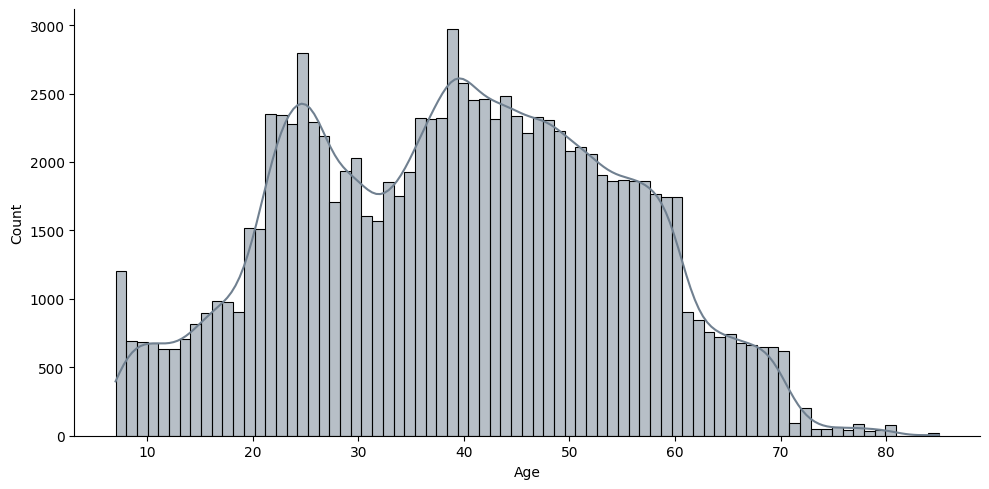

In [7]:
# GRAFICAMOS LA COL EDAD
sns.displot(df['Age'],kde=True,aspect=2,color='slategray')

PODEMOS VER QUE  :  
Más de 2.000 pasajeros tienen edades comprendidas entre 23 y 27 años y entre 35 y 45 años

/var/folders/d8/z387sy5n6jdg57dy2sd1lqbw0000gn/T/ipykernel_63053/1552480677.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/d8/z387sy5n6jdg57dy2sd1lqbw0000gn/T/ipykernel_63053/1552480677.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




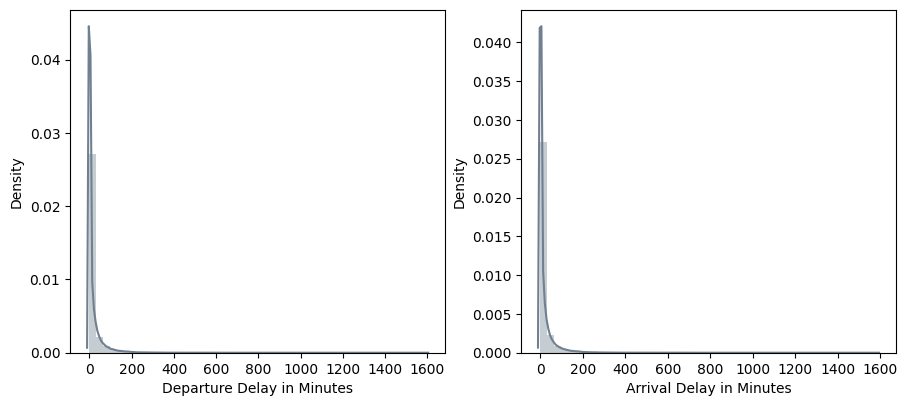

In [8]:
# GRAFICAMOS LA COL DE MINUTOS DE RETRASO
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(df['Departure Delay in Minutes'],color='slategray')
plt.subplot(122)
sns.distplot(df['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)

<!-- PODEMOS OBSERVAR QUE :  
Más de 4000 pasajeros viajan durante aproximadamente <800 distancias de vuelo -->

Text(0, 0.5, 'Ratio')

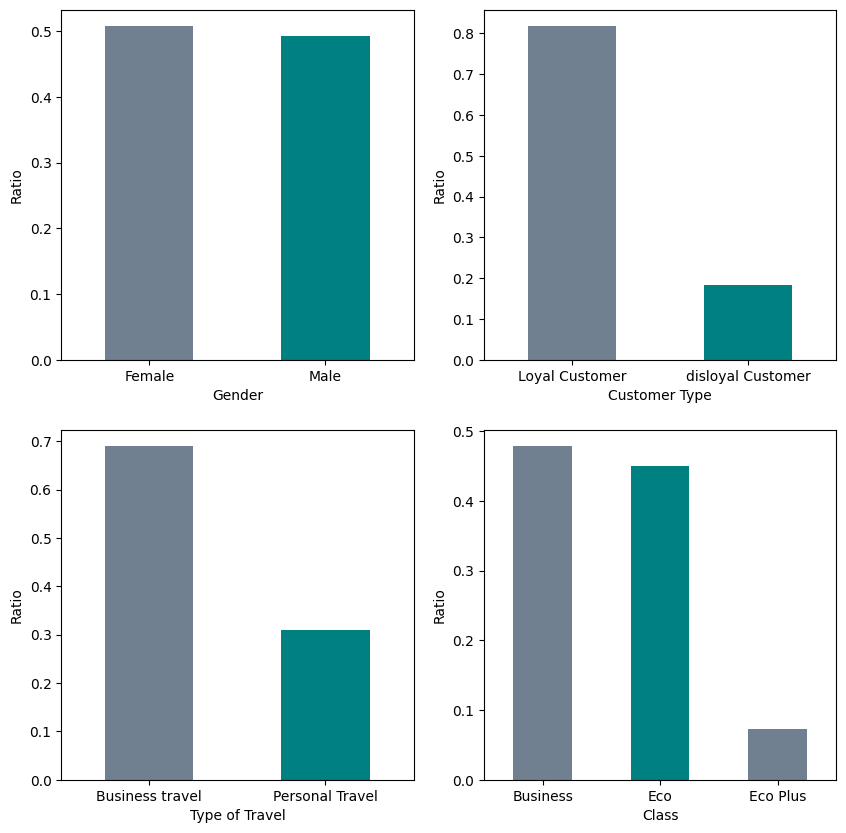

In [9]:
# GRAFICA DE GENERO, TIPO DE CLIENTE, TIPO DE VIAJE Y CLASE
plt.figure(1,figsize=(10,10))
plt.subplot(221)
df['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

plt.subplot(222)
df['Customer Type'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Customer Type')
plt.ylabel('Ratio')

plt.subplot(223)
df['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')


plt.subplot(224)
df['Class'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Class')
plt.ylabel('Ratio')

Variable independiente (Categórica: Nominal)   
Algunas de las características son nominales: género, tipo de cliente, tipo de viaje, clase


PODEMOS VER LO SIGUIENTE:  
Hay un 51% de pasajeras femeninas.   
El 82% de los pasajeros son clientes fieles.  
El 69% de los pasajeros viajan por motivos de negocios.   
El 48% de los pasajeros viaja en clase business y el 45% en clase Eco.

Text(0.5, 0, 'Inflight entertainment')

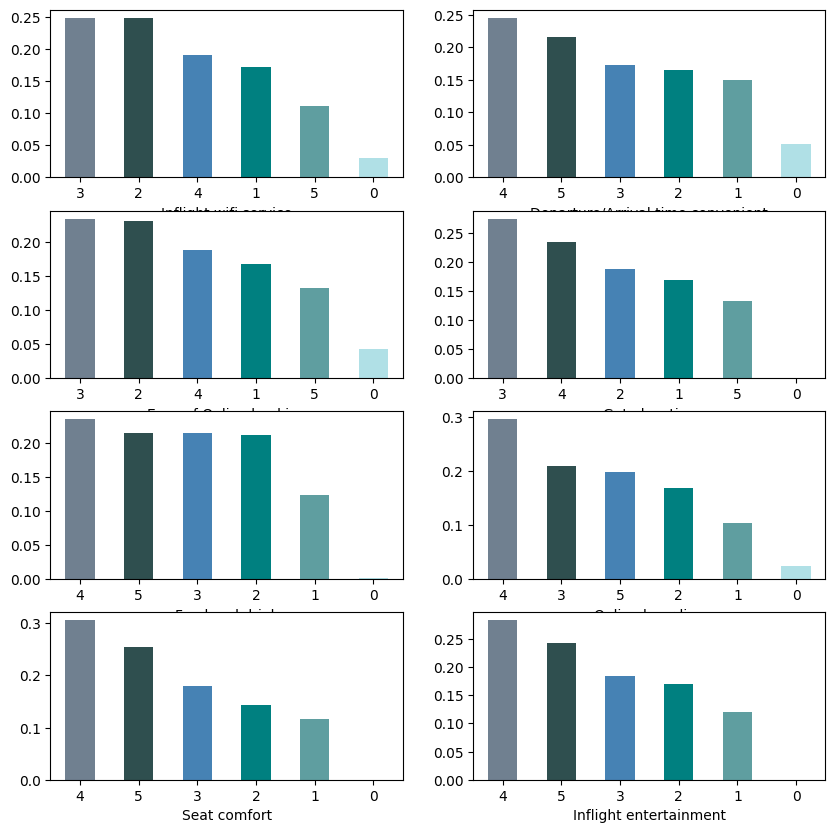

In [10]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
df['Inflight wifi service'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
df['Departure/Arrival time convenient'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
df['Ease of Online booking'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
df['Gate location'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
df['Food and drink'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
df['Online boarding'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
df['Seat comfort'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
df['Inflight entertainment'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')

Variable independiente (categórica: ordinal)  

Aproximadamente el 25 % de los pasajeros obtuvieron una calificación de 3 y el 25 % de ellos obtuvieron una calificación de 2 para el servicio wifi a bordo  

El 24% de los pasajeros calificaron con 4 la hora de salida/llegada conveniente y el 21% de los pasajeros calificaron con 5 la misma calificación.  

Aproximadamente el 23% de los pasajeros califica 3 por la facilidad de reserva en línea y el 23% de ellos califica 2  

El 27,5% de los pasajeros califica con 3 la ubicación de la puerta de embarque.  

Para servicio de alimentos y bebidas 23% de calificaciones = 4  
 
Para el embarque en línea aproximadamente el 30% de los pasajeros dieron 4 calificaciones  

Para la comodidad del asiento, la mayoría de los pasajeros tienen un nivel satisfactorio de 4.  
  
Aproximadamente el 28 % de los pasajeros otorgó 4 calificaciones al entretenimiento a bordo


## QUE COMIENCEN LOS JUEGOS DEL HAMBRE

In [11]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: >

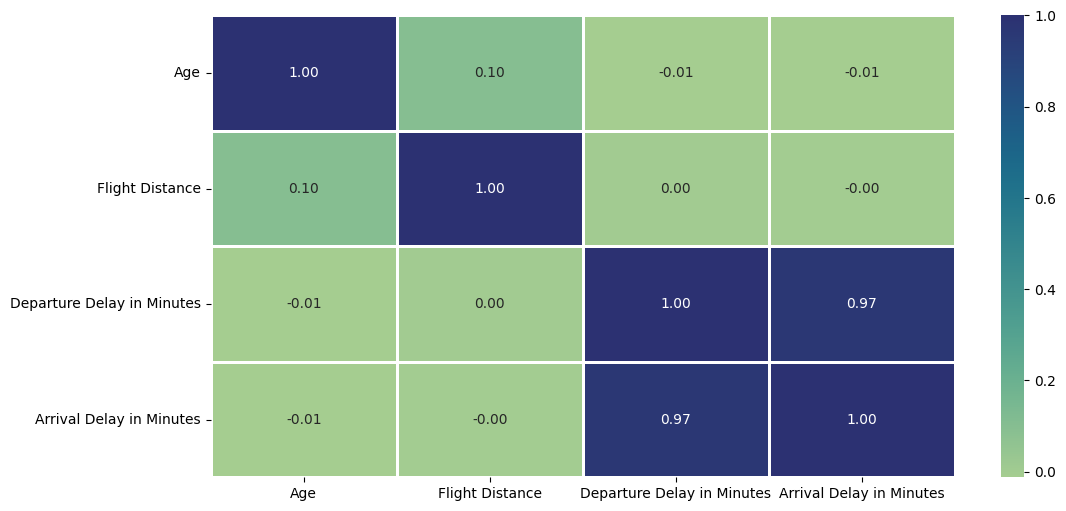

In [12]:
# Heatmap of the correlation between the features
plt.figure(figsize=(12, 6))
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.heatmap(df[num].corr(),
            cmap = 'crest',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [13]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

In [14]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## ML

In [15]:
# Eliminamos las columnas que no vamos a usar
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [16]:
# Dividimos las columnas en categoricas y numericas
cat = ["Gender", "Customer Type", 'Type of Travel', 'Class', "Inflight wifi service", "Departure/Arrival time convenient", 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
num = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [17]:
# Define un mapeo de valores numéricos a las categorías
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# Aplica el mapeo a la columna 'satisfaction'
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)

# Asegúrate de que ahora los valores sean numéricos
df['satisfaction'] = df['satisfaction'].astype(int)

In [18]:
# usamos onehotencoder para las columnas categoricas
OH_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

OH_cols = pd.DataFrame(OH_enc.fit_transform(df[cat]))
OH_cols.index = df.index


# Get the unique values in each categorical column
unique_values_per_column = [df[col].unique() for col in cat]

# Create column names for one-hot encoded features
newcolumns = [
    f"{col}{value}" for col, values in zip(cat, unique_values_per_column) for value in values
]
OH_cols.columns = newcolumns

df = df.drop(cat, axis=1)
df = pd.concat([df, OH_cols], axis=1)

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [19]:
# Escalamos las columnas numericas
scaler = StandardScaler()
df[num] = scaler.fit_transform(df[num])

In [20]:
features = df.drop('satisfaction', axis=1)
target = df['satisfaction']

models = [
    RandomForestClassifier(max_depth=2, random_state=0),
    GradientBoostingClassifier(
        learning_rate=0.3,
        loss="exponential",
        max_depth=4,
        min_samples_split=4,
        n_estimators=50,
    ),
    LogisticRegression(),
    XGBClassifier(),
    GaussianNB(),
    CatBoostClassifier(),
]

In [21]:
def split_data(features, target, test_size=0.4, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, test_size=0.5, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

def clean_name_model(model):
    pattern = r'(?<=[a-z])(?=[A-Z])'
    return re.sub(pattern, ' ', model)

def evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    time_start = time.time()
    model.fit(X_train, y_train)
    time_end = time.time()
    model_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
    
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mae_train = mae(y_train, train_predictions)
    test_mae_test = mae(y_test, test_predictions)
    overfitting_percentage = (test_mae_test - train_mae_train) / train_mae_train * 100
    
    # Calcular la curva ROC y el AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Calcular las matrices de confusión y limpia el nombre del modelo
    conf_mx = confusion_matrix(y_test, y_pred_test)
    name_model = clean_name_model(model.__class__.__name__)

    return {
        'Model': name_model,
        'Model Scores': model_scores,
        'Accuracy (test)': accuracy_test,
        'Accuracy (validate)': accuracy_val,
        'Precision (test)': precision_test,
        'Precision (validate)': precision_val,
        'Recall (test)': recall_test,
        'Recall (validate)': recall_val,
        'Train MAE': train_mae_train,
        'Test MAE': test_mae_test,
        'Training Time': time_end - time_start,
        'Overfitting %': overfitting_percentage,
        'Confusion Matrix': conf_mx,
        'ROC Curve': (fpr, tpr, auc),
    }

def train_and_evaluate_models(df, features, target, models):
    X_train, X_test, y_train, y_test, X_val, y_val = split_data(features, target)

    # Evaluate the models
    metrics = []
    for model in models:
        model_metrics = evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val)
        metrics.append(model_metrics)

    return pd.DataFrame(metrics)

In [22]:
df_metrics = train_and_evaluate_models(df, features, target, models)

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/kamilo/.local/share/virtualenvs/Aerolinea-_onwHZT3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Learning rate set to 0.06016
0:	learn: 0.6158838	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.5667360	total: 69.4ms	remaining: 34.6s
2:	learn: 0.5093705	total: 75.8ms	remaining: 25.2s
3:	learn: 0.4741235	total: 82.7ms	remaining: 20.6s
4:	learn: 0.4351523	total: 89.1ms	remaining: 17.7s
5:	learn: 0.4120186	total: 95.7ms	remaining: 15.9s
6:	learn: 0.3875620	total: 104ms	remaining: 14.8s
7:	learn: 0.3699425	total: 111ms	remaining: 13.8s
8:	learn: 0.3514170	total: 118ms	remaining: 13s
9:	learn: 0.3331475	total: 126ms	remaining: 12.4s
10:	learn: 0.3186492	total: 134ms	remaining: 12.1s
11:	learn: 0.3060363	total: 142ms	remaining: 11.7s
12:	learn: 0.2879952	total: 149ms	remaining: 11.3s
13:	learn: 0.2731532	total: 155ms	remaining: 10.9s
14:	learn: 0.2550077	total: 163ms	remaining: 10.7s
15:	learn: 0.2446224	total: 171ms	remaining: 10.5s
16:	learn: 0.2355281	total: 177ms	remaining: 10.3s
17:	learn: 0.2308159	total: 185ms	remaining: 10.1s
18:	learn: 0.2253255	total: 191ms	remaining: 9.87s
19:	lear

In [23]:
df_metrics

,Model,Model Scores,Accuracy (test),Accuracy (validate),Precision (test),Precision (validate),Recall (test),Recall (validate),Train MAE,Test MAE,Training Time,Overfitting %,Confusion Matrix,ROC Curve
0,Random Forest Classifier,"[0.8703985884994787, 0.8676718261287995, 0.869...",0.867668,0.869400,0.922912,0.922426,0.760309,0.766443,0.129399,0.132332,0.942119,2.266861,"[[11135, 576], [2174, 6896]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Gradient Boosting Classifier,"[0.9519608629400914, 0.9557302109230893, 0.957...",0.957461,0.956980,0.964270,0.963226,0.937266,0.937630,0.041882,0.042539,6.979768,1.568650,"[[11396, 315], [569, 8501]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Logistic Regression,"[0.9290239794690833, 0.9347181008902077, 0.932...",0.933738,0.932775,0.934878,0.933146,0.911687,0.911936,0.065943,0.066262,3.761389,0.484888,"[[11135, 576], [801, 8269]]","([0.0, 0.0, 0.0, 8.538980445734779e-05, 8.5389..."
3,XGBClassifier,"[0.9593391611195765, 0.962707514636298, 0.9663...",0.961551,0.962369,0.970960,0.969543,0.940022,0.943780,0.019634,0.038449,3.960982,95.830192,"[[11456, 255], [544, 8526]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Gaussian NB,"[0.7492982596840163, 0.6257117651776406, 0.625...",0.631972,0.627111,0.543070,0.540747,0.988423,0.989459,0.373809,0.368028,0.048334,-1.546378,"[[4168, 7543], [105, 8965]]","([0.0, 0.05507642387498932, 0.0552472034839040..."
5,Cat Boost Classifier,"[0.9596599566925976, 0.9636699013553613, 0.965...",0.963813,0.963524,0.973367,0.971748,0.942889,0.944219,0.020404,0.036187,6.632538,77.355646,"[[11477, 234], [518, 8552]]","([0.0, 0.0, 0.0, 8.538980445734779e-05, 8.5389..."


## Select Best Model

In [24]:
def plot_metrics(df_metrics):
    for i in range(len(df_metrics['Confusion Matrix'])):
        plt.figure(figsize=(12, 4))
        
        # Graficar la matriz de confusión
        plt.subplot(1, 2, 1)
        confusion_matrix = df_metrics['Confusion Matrix'][i]
        sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
        plt.title(df_metrics['Model'][i])
        
        # Agregar etiquetas a los cuadrantes
        plt.text(0.5, 0.25, "Verdaderos Positivos", ha='center', va='center', fontsize=9, color='white')
        plt.text(0.5, 1.25, "Falsos Negativos", ha='center', va='center', fontsize=9, color='black')
        plt.text(1.5, 0.25, "Falsos Positivos", ha='center', va='center', fontsize=9, color='black')
        plt.text(1.5, 1.25, "Verdaderos Negativos", ha='center', va='center', fontsize=9, color='white')
        
        # Graficar la curva ROC
        plt.subplot(1, 2, 2)
        fpr, tpr, auc = df_metrics['ROC Curve'][i]
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        
        plt.tight_layout()
        plt.show()


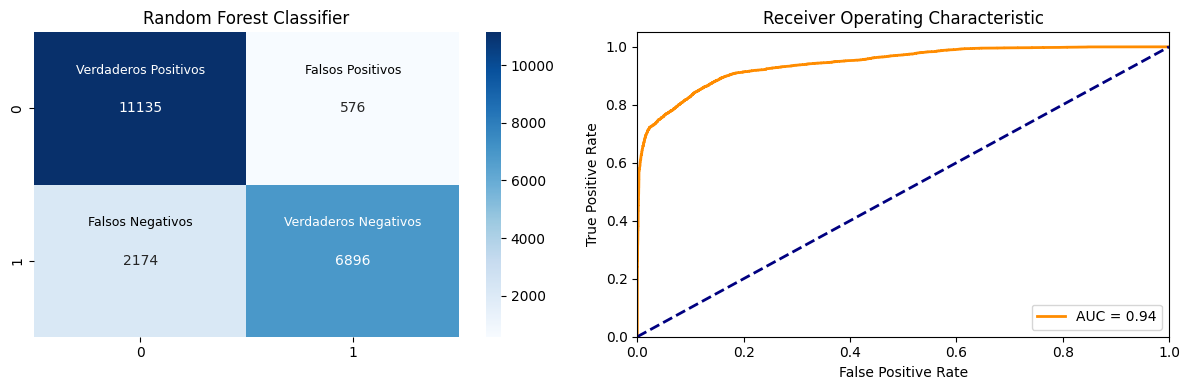

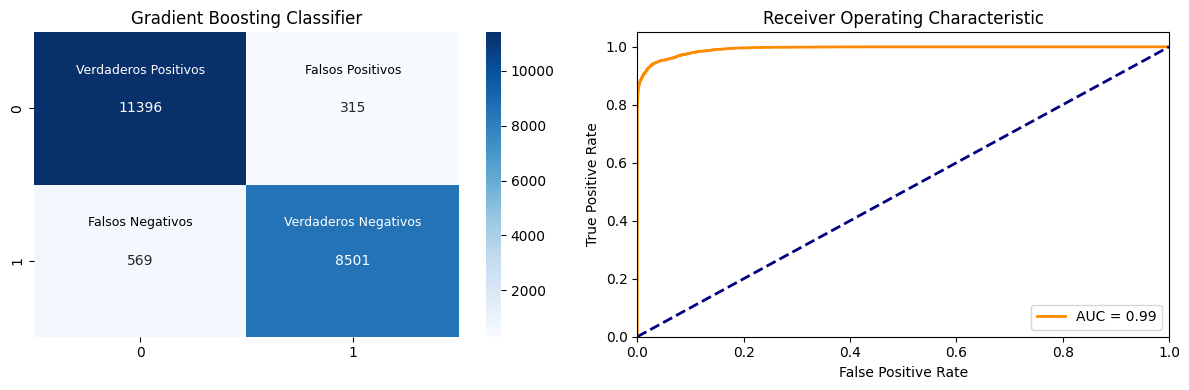

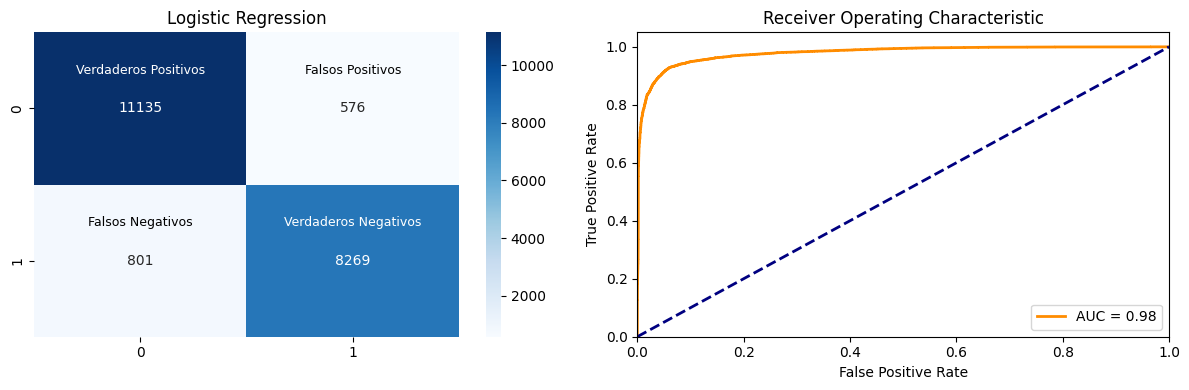

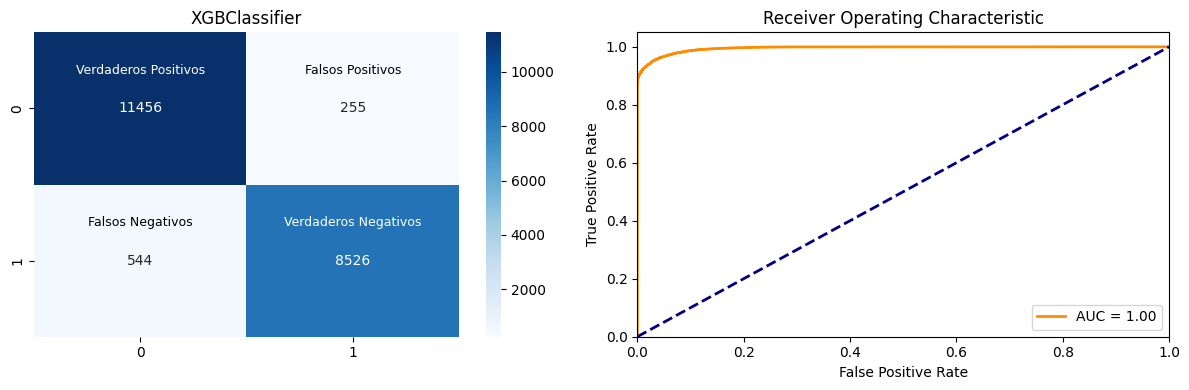

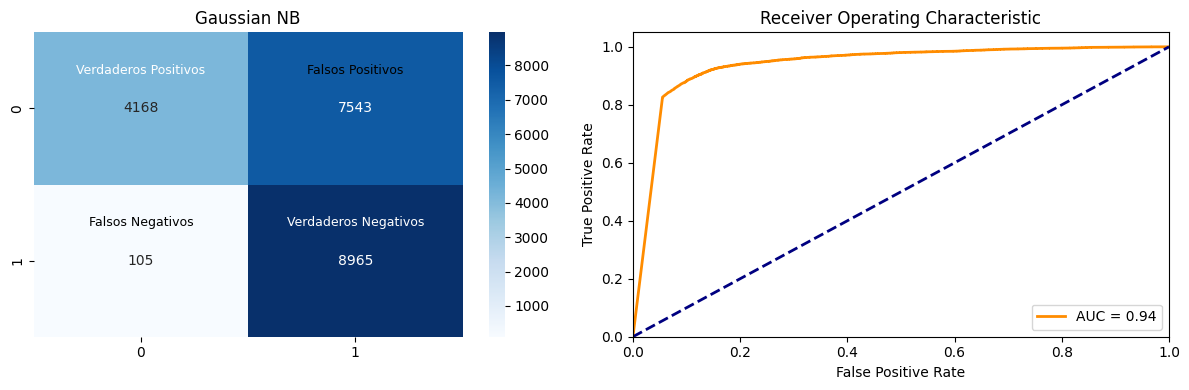

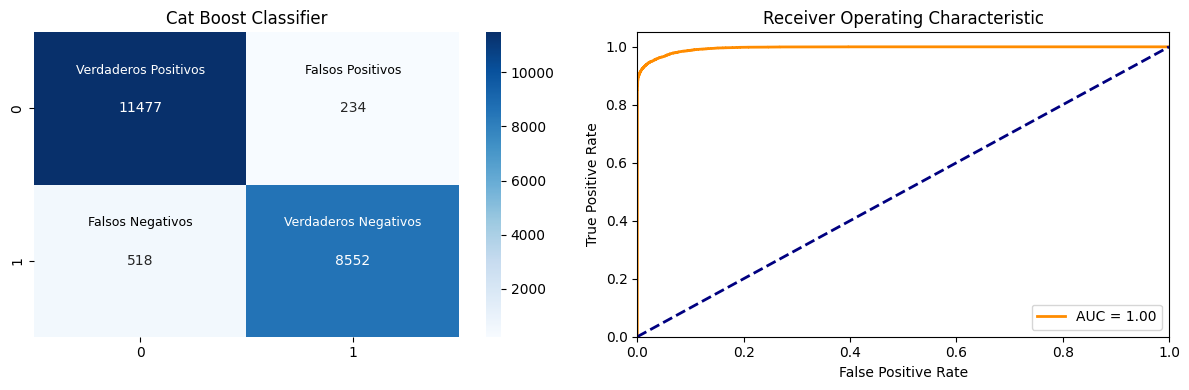

In [25]:
plot_metrics(df_metrics)

In [26]:
def print_cross_val_scores(df_metrics):
    data = []

    for i in range(len(df_metrics['Model Scores'])):
        model_name = df_metrics['Model'][i]
        model_scores = df_metrics['Model Scores'][i]
        fold_scores = {'Model': model_name}
        
        for j in range(len(model_scores)):
            fold_scores[f'Fold {j}'] = model_scores[j]
        fold_scores['Mean'] = np.mean(model_scores)
        
        data.append(fold_scores)

    return pd.DataFrame(data)

In [27]:
metrics_df = print_cross_val_scores(df_metrics)
metrics_df

,Model,Fold 0,Fold 1,Fold 2,Fold 3,Fold 4,Mean
0,Random Forest Classifier,0.870399,0.867672,0.869827,0.871591,0.871591,0.870216
1,Gradient Boosting Classifier,0.951961,0.955730,0.957892,0.957090,0.955406,0.955616
2,Logistic Regression,0.929024,0.934718,0.932788,0.936237,0.933750,0.933303
3,XGBClassifier,0.959339,0.962708,0.966394,0.963747,0.961100,0.962658
4,Gaussian NB,0.749298,0.625712,0.625120,0.625521,0.628890,0.650908
5,Cat Boost Classifier,0.959660,0.963670,0.965913,0.963667,0.962143,0.963011


In [32]:
def select_best_model(df_metrics):
    df_metrics['Score'] = df_metrics['Accuracy (test)'] + df_metrics['Precision (test)'] - df_metrics['Overfitting %'].apply(lambda x: max(0, x))

    df_metrics = df_metrics.sort_values(by='Score', ascending=False)
    best_model = df_metrics.copy().iloc[0]
    best_model.drop(['Model Scores', 'Confusion Matrix', 'ROC Curve', 'Score'], inplace=True)
    return pd.DataFrame(best_model)

In [33]:
result = tabulate(select_best_model(df_metrics), tablefmt='rounded_grid', showindex=True)
print(result)

╭──────────────────────┬─────────────────────╮
│ Model                │ Logistic Regression │
├──────────────────────┼─────────────────────┤
│ Accuracy (test)      │ 0.9337375487223907  │
├──────────────────────┼─────────────────────┤
│ Accuracy (validate)  │ 0.932775131129397   │
├──────────────────────┼─────────────────────┤
│ Precision (test)     │ 0.9348784624081402  │
├──────────────────────┼─────────────────────┤
│ Precision (validate) │ 0.9331460674157304  │
├──────────────────────┼─────────────────────┤
│ Recall (test)        │ 0.9116868798235943  │
├──────────────────────┼─────────────────────┤
│ Recall (validate)    │ 0.9119358735038982  │
├──────────────────────┼─────────────────────┤
│ Train MAE            │ 0.06594270315357223 │
├──────────────────────┼─────────────────────┤
│ Test MAE             │ 0.06626245127760935 │
├──────────────────────┼─────────────────────┤
│ Training Time        │ 3.7613890171051025  │
├──────────────────────┼─────────────────────┤
│ Overfitting